<a href="https://colab.research.google.com/github/Jacksonngugi/health-cost-prediction/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras.layers.experimental import preprocessing

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-11-12 09:39:56--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-11-12 09:39:56 (4.50 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
COLUMNS = ['sex','smoker','region']

for column in COLUMNS:
  dataset[column] = pd.Categorical(dataset[column])
  dataset[column] = dataset[column].cat.codes

# split 80% of data for train_dataset and 20% test_dataset
train_dataset = dataset.sample(frac=.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
578,52,1,30.2,1,0,3,9724.53
610,47,0,29.4,1,0,2,8547.69
569,48,1,40.6,2,1,1,45702.02
1034,61,1,38.4,0,0,1,12950.07
198,51,0,18.1,0,0,1,9644.25


In [ ]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

train_dataset


,age,sex,bmi,children,smoker,region
578,52,1,30.2,1,0,3
610,47,0,29.4,1,0,2
569,48,1,40.6,2,1,1
1034,61,1,38.4,0,0,1
198,51,0,18.1,0,0,1
...,...,...,...,...,...,...
584,19,1,20.7,0,0,3
147,51,0,37.7,1,0,2
160,42,0,26.6,0,1,1
750,37,0,26.4,0,1,2


In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [ ]:
def build_model():
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]),
      layers.Dense(64,activation=tf.nn.relu),
      layers.Dense(1)
    ])

  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(
      loss='mse',
      optimizer=optimizer,
      metrics=['mae','mse']
       )
  return model

In [ ]:
model = build_model()
model.summary()
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['mae', 'mse'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [ ]:
EPOCHS=150
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0,callbacks=early_stop)

9/9 - 0s - loss: 2271.2185 - mae: 2271.2185 - mse: 31689052.0000 - 38ms/epoch - 4ms/step
Testing set Mean Abs Error: 2271.22 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


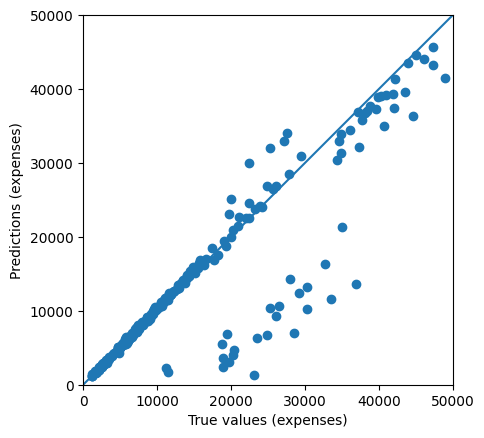

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
